<a href="https://colab.research.google.com/github/Manjunathmr0307/Zeotap/blob/main/Manjunath_MR_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers=pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
customer_summary=transactions.groupby('CustomerID').agg(
    total_transactions=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    total_value=('TotalValue', 'sum')
).reset_index()

In [4]:
customer_data=customers.merge(customer_summary, on='CustomerID', how='left').fillna(0)

In [5]:
features=['total_transactions', 'avg_transaction_value', 'total_value']
X=customer_data[features]

In [6]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [21]:
distortions=[]
for k in range(1, 11):
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

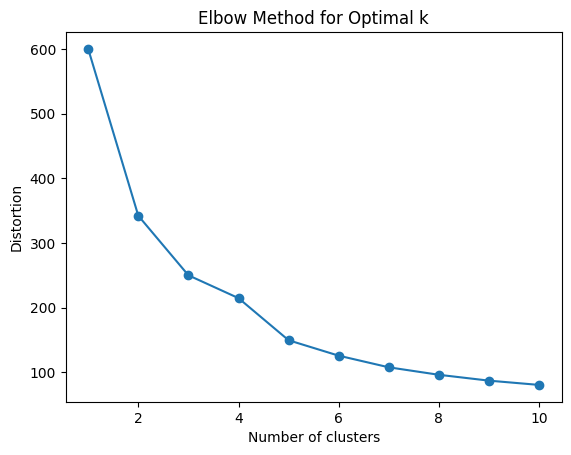

In [22]:
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [23]:
optimal_k=4

In [25]:
kmeans=KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster']=kmeans.fit_predict(X_scaled)

In [26]:
db_index=davies_bouldin_score(X_scaled, customer_data['Cluster'])
print(f"DB Index: {db_index}")

DB Index: 1.0742466760923444


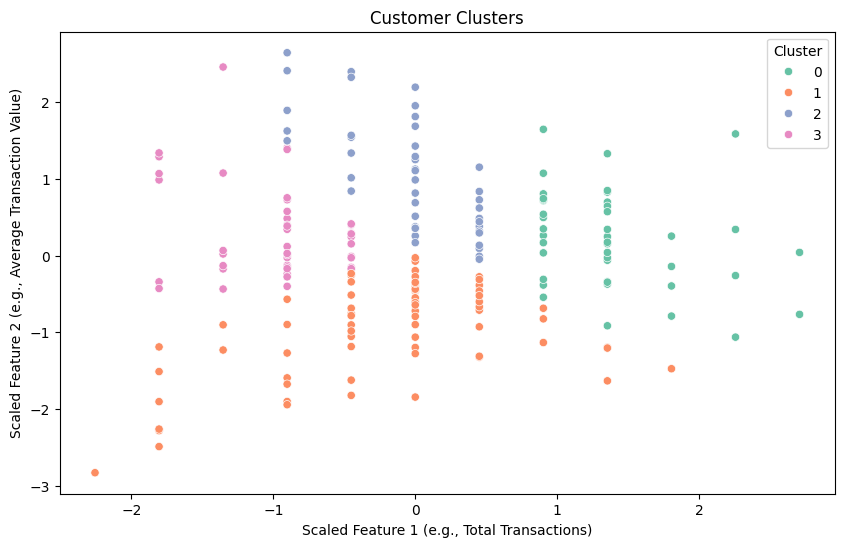

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_scaled[:, 0],y=X_scaled[:, 1],hue=customer_data['Cluster'],palette='Set2'
)
plt.title('Customer Clusters')
plt.xlabel('Scaled Feature 1 (e.g., Total Transactions)')
plt.ylabel('Scaled Feature 2 (e.g., Average Transaction Value)')
plt.legend(title='Cluster')
plt.show()

In [28]:
customer_data[['CustomerID', 'Cluster']].to_csv('Customer_Segments.csv', index=False)
print("Customer_Segments.csv generated.")

Customer_Segments.csv generated.


In [11]:
from google.colab import files
files.download("Customer_Segments.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>